**CLASSIFICATION USING LOGISTIC REGRESSION MODEL**

IMPORTING THE LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

LOAD THE DATASET

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/Kraghav2002/Machine-Learning---Core-Concepts/main/8_3_2023/diabetes.csv")

EXPLORE THE DATASET

In [7]:
# View the first few rows of the data
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [8]:
# Check the shape of the data
print(data.shape)


(768, 9)


In [9]:
# Check the data types of the columns
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [10]:
# Check for missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


PREPARING THE DATASET

In [12]:
# Split the data into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

TRAINING THE LOGISTIC REGRESSION MODEL

In [13]:
# Create a logistic regression model object
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

EVALUATION OF THE MODEL

In [14]:
# Make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix to see how many predictions were correct
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', confusion_mat)

Accuracy: 0.7532467532467533
Confusion matrix: [[79 20]
 [18 37]]


***THEREFORE , THE ACCURACY OF THE MODEL IS 75.324 %.***

**CLASSIFICATION USING DECISION TREES**

Import Libraries

In [15]:
from sklearn.tree import DecisionTreeClassifier

Preprocess Data

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2, random_state=42)

# Separate the features and target variable
features = ['Pregnancies' , 'Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' , 'Age']
X_train = X_train[features]
X_test = X_test[features]

Train the Model

In [19]:
# Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Evaluate the Model

In [20]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7467532467532467


***THEREFORE , THE ACCURACY OF THE MODEL IS 74.675 %.***

Visualize the Decision Tree

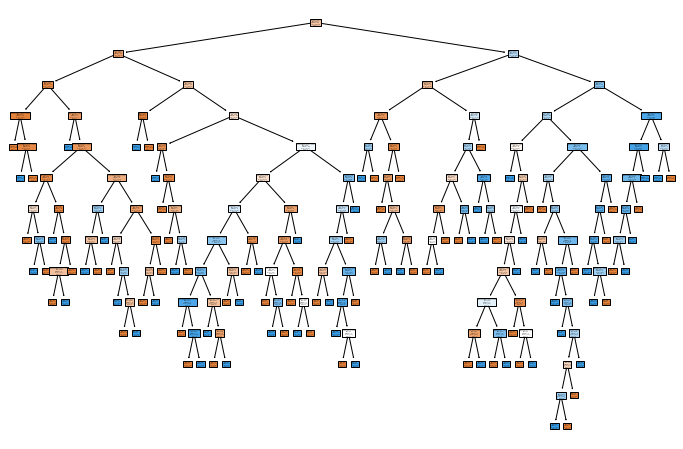

In [23]:
class_names = [str(c) for c in data['Outcome'].unique()]

# Visualize the decision tree
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(clf, feature_names=features, class_names=class_names, filled=True)
plt.show()